In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(/spamdata.csv,encoding= 'latin-1')

SyntaxError: ignored

# New Section

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df=df.rename(columns={'v1':'Type','v2':'Messages'})

In [ ]:
df.head()

,Type,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data=pd.DataFrame(df)
Spamfilter=data.loc[data['Type']=='spam']

In [ ]:
data['Target']=data.Type.map(lambda x: 0 if x=='spam' else 1)

In [ ]:
print(Spamfilter)

      Type                                           Messages
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [ ]:
Hamfilter=data.loc[data['Type']=='ham']

In [ ]:
Hamfilter

,Type,Messages,Target
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
6,ham,Even my brother is not like to speak with me. ...,1
...,...,...,...
5565,ham,Huh y lei...,1
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [ ]:
from wordcloud import WordCloud

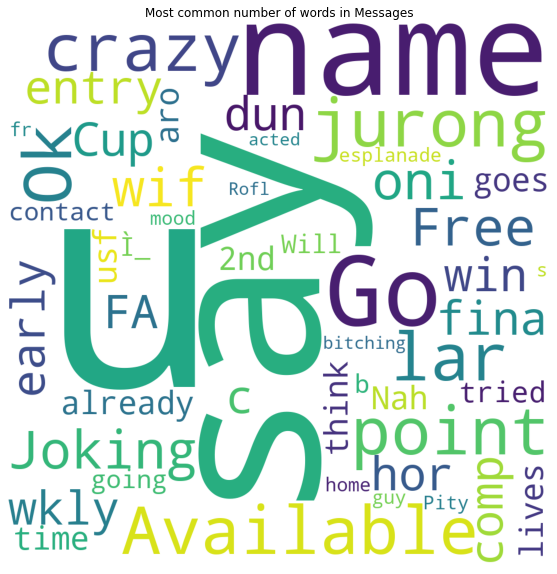

In [ ]:
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str(df['Messages']))
plt.rcParams['figure.figsize']=(10,10)
plt.title('Most common number of words in Messages')
plt.axis('off')
plt.imshow(wordcloud)

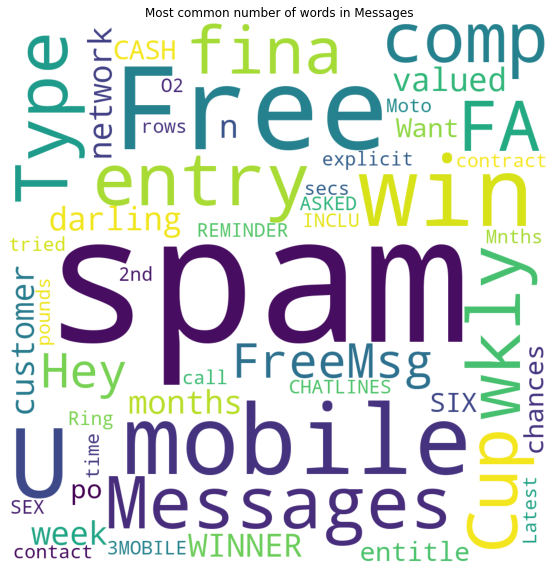

In [ ]:
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str(Spamfilter))
plt.rcParams['figure.figsize']=(10,10)
plt.title('Most common number of words in Messages')
plt.axis('off')
plt.imshow(wordcloud)

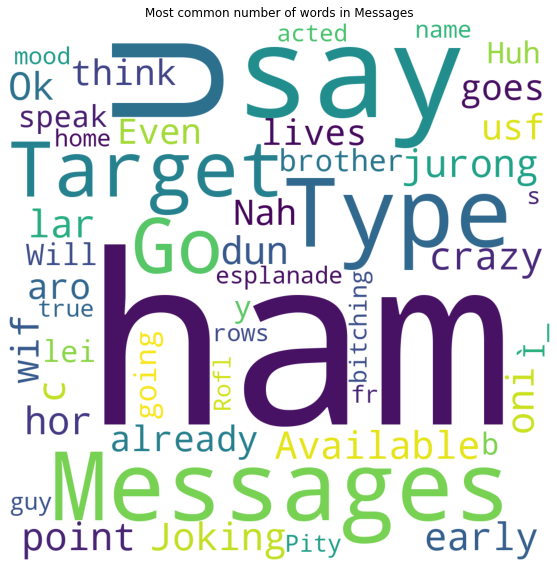

In [ ]:
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str(Hamfilter))
plt.rcParams['figure.figsize']=(10,10)
plt.title('Most common number of words in Messages')
plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhaskar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i in range(0,5572):
    review=re.sub('[^a-zA-Z]','',data['Messages'][i])
    review=review.lower()
    review=review.split()
    
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=''.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv= CountVectorizer()

In [ ]:
x=cv.fit_transform(corpus).toarray()
y=data.Target

In [ ]:
print(x.shape)
print(y.shape)

(5572, 5079)
(5572,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score

In [ ]:
model.score(x_train,y_train)

0.9997607083034219

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
print('confusion_matrix:',confusion_matrix(y_pred,y_train))



confusion_matrix: [[  39    0]
 [ 517 3623]]


<AxesSubplot:>

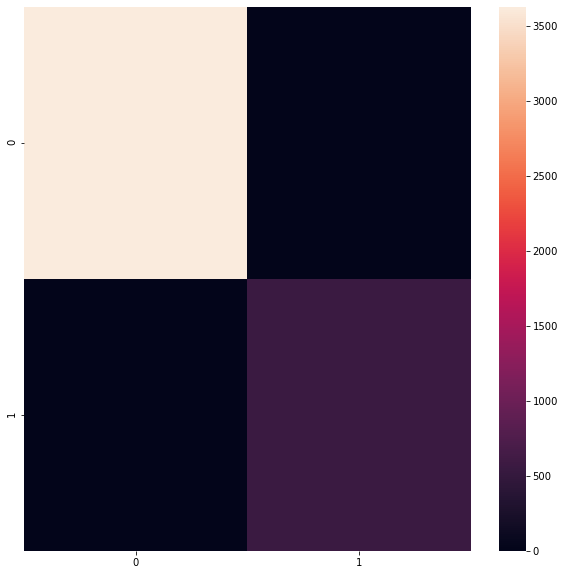

In [ ]:
sns.heatmap(confusionmatrix)

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [ ]:
model.score(x_train,y_train)

0.8762861928691075

In [ ]:
print('confusion_matrix:',confusion_matrix(y_pred,y_train))
print('precision_score:',precision_score(y_pred,y_train))
print('accuracy_score:',accuracy_score(y_pred,y_train))
print('Recall_Score:',recall_score(y_pred,y_train))
print('F1_score:',f1_score(y_pred,y_train))
print('roc_auc_score:',roc_auc_score(y_pred,y_train))

confusion_matrix: [[  39    0]
 [ 517 3623]]
precision_score: 1.0
accuracy_score: 0.8762861928691075
Recall_Score: 0.8751207729468599
F1_score: 0.9334020352956331
roc_auc_score: 0.9375603864734299


In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [ ]:
model.score(x_train,y_train)
print('confusion_matrix:',confusion_matrix(y_pred,y_train))
print('precision_score:',precision_score(y_pred,y_train))
print('accuracy_score:',accuracy_score(y_pred,y_train))
print('Recall_Score:',recall_score(y_pred,y_train))
print('F1_score:',f1_score(y_pred,y_train))
print('roc_auc_score:',roc_auc_score(y_pred,y_train))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
model.score(x_train,y_train)
print('confusion_matrix:',confusion_matrix(y_pred,y_train))
print('precision_score:',precision_score(y_pred,y_train))
print('accuracy_score:',accuracy_score(y_pred,y_train))
print('Recall_Score:',recall_score(y_pred,y_train))
print('F1_score:',f1_score(y_pred,y_train))
print('roc_auc_score:',roc_auc_score(y_pred,y_train))

confusion_matrix: [[ 113    0]
 [ 443 3623]]
precision_score: 1.0
accuracy_score: 0.893993778415889
Recall_Score: 0.8910477127397934
F1_score: 0.9423852256470283
roc_auc_score: 0.9455238563698967


In [ ]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
model.score(x_train,y_train)
print('confusion_matrix:',confusion_matrix(y_pred,y_train))
print('precision_score:',precision_score(y_pred,y_train))
print('accuracy_score:',accuracy_score(y_pred,y_train))
print('Recall_Score:',recall_score(y_pred,y_train))
print('F1_score:',f1_score(y_pred,y_train))
print('roc_auc_score:',roc_auc_score(y_pred,y_train))

confusion_matrix: [[ 171    4]
 [ 385 3619]]
precision_score: 0.9988959425890146
accuracy_score: 0.9069155300311079
Recall_Score: 0.9038461538461539
F1_score: 0.948996984397535
roc_auc_score: 0.9404945054945054
